In [1]:
import numpy as np
import pandas as pd
import glob, os, sys

import matplotlib.pyplot as plt
%matplotlib inline

import h5py

from param import *

In [4]:
files = sorted(glob.glob(src_dir+"/*.csv"))
for f in files : print(f)

/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/Datasheet.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.00.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.01.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.02.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.03.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.04.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.05.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.06.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.07.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.08.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.09.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.10.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.11.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.12.csv
/mnt/recordings/Collabolation/Takanari/2018-09-03/csv/No.13.csv
/mnt/recordings/Collabolation/Takana

In [5]:
df_mice = pd.read_csv(os.path.join(src_dir, "Datasheet.csv"))
df_mice

,PMA塗布からの経過日数,積算回数,備考
0,0,1,不完全（apicalのみ、basalは計測していない）
1,1,1,NaN
2,1,1,NaN
3,1,1,NaN
4,2,1,NaN
5,2,1,NaN
6,2,1,NaN
7,4,1,NaN
8,4,1,NaN
9,4,1,不完全（apicalのみ、basalは計測していない）


In [6]:
switch = {
    "show_column" : False,
    "plot_all" : False,
}


for i, row in df_mice.iterrows():
    df = pd.read_csv(os.path.join(src_dir, "No.{0:0>2}.csv".format(i)))
    
    if switch["show_column"]:
        print(i, df.columns)
    
    if switch["plot_all"]:
        dat = df.values
        plt.clf()
        for s in dat.T:
            plt.plot(s)
        plt.show()

## save as HDF5 format

In [7]:
outf = src_dir.replace("csv", "all.h5")
h5file = h5py.File(outf, "w")


for n_mice in range(len(df_mice)):
    d = 'mice{0:0>2}'.format(n_mice)
    h5file.create_group(d)
    
    for str_pos in ["La", "Lb", "Ra", "Rb"]:
        d = 'mice{0:0>2}/{1}'.format(n_mice, str_pos)
        h5file.create_group(d)

for i, row in df_mice.iterrows():
    df = pd.read_csv(os.path.join(src_dir, "No.{0:0>2}.csv".format(i)))
    for n, col in enumerate(df.columns):
        str_mice, str_pos, str_depth = col.split('_')
        #print( str_mice, str_pos, str_depth)
        assert int(str_mice) == i
        h5file.create_dataset('mice{0}/{1}/{2:0>3}'.format(str_mice, str_pos, int(str_depth)), data=df.values.T[n])
        h5file.flush()

In [8]:
h5file.flush()
h5file.close()

## check

In [9]:
hf = h5py.File(outf,'r')
dataset_names = list(hf.keys())
print(dataset_names)

['mice00', 'mice01', 'mice02', 'mice03', 'mice04', 'mice05', 'mice06', 'mice07', 'mice08', 'mice09', 'mice10', 'mice11', 'mice12', 'mice13', 'mice14', 'mice15', 'mice16', 'mice17', 'mice18', 'mice19', 'mice20', 'mice21', 'mice22', 'mice23', 'mice24', 'mice25', 'mice26', 'mice27', 'mice28', 'mice29', 'mice30', 'mice31', 'mice32', 'mice33', 'mice34', 'mice35', 'mice36', 'mice37', 'mice38', 'mice39', 'mice40']


In [10]:
list(hf['mice00'].keys())

['La', 'Lb', 'Ra', 'Rb']

In [11]:
list(hf['mice00']['La'].keys())

['000', '010', '050', '100', '150', '200', '250']

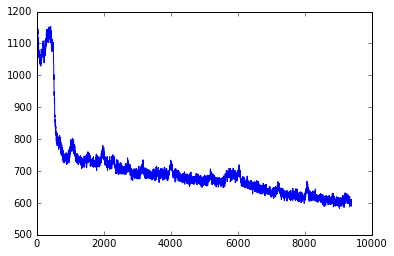

In [12]:
spectle = np.array(hf['mice00']['La']['000'])
plt.plot(spectle)

In [13]:
hf.close()

## reference


HDF5 : http://villageofsound.hatenadiary.jp/entry/2014/11/03/234813